Q9. Performance Evaluation Programming
1.	Train a kNN classifier (k=5) on Iris dataset.
2.	Compute confusion matrix and display it with sklearn.metrics.confusion_matrix.
3.	Compute accuracy, precision, recall, F1 using classification_report.
4.	Plot the ROC curve and compute AUC.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris_data = load_iris()
features = iris_data.data       # all four features
labels   = iris_data.target     # class labels
feat_names = iris_data.feature_names
class_names = iris_data.target_names

# Train/test split with stratification
X_tr, X_te, y_tr, y_te = train_test_split(
    features, labels, test_size=0.3, stratify=labels, random_state=0
)

# Build pipeline (scaling + kNN with k=5)
knn_model = make_pipeline(StandardScaler(),
                          KNeighborsClassifier(n_neighbors=5))

# Fit the model
knn_model.fit(X_tr, y_tr)

# Accuracy on training and test sets
train_score = accuracy_score(y_tr, knn_model.predict(X_tr))
test_score  = accuracy_score(y_te, knn_model.predict(X_te))
print(f"[k=5] Training Accuracy: {train_score:.3f}")
print(f"[k=5] Test Accuracy    : {test_score:.3f}")

[k=5] Training Accuracy: 0.962
[k=5] Test Accuracy    : 0.978


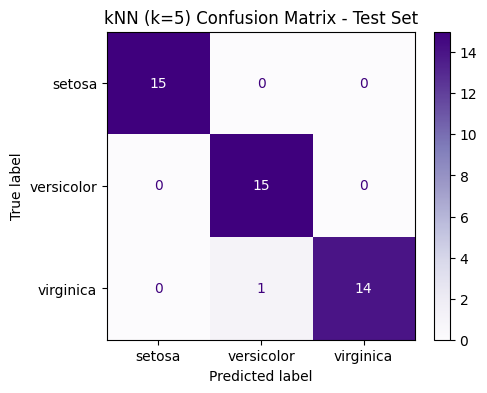

Confusion Matrix (rows=true, cols=predicted):
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [2]:
# 2. Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_predicted = knn_model.predict(X_te)
conf_mat = confusion_matrix(y_te, y_predicted)

fig, ax = plt.subplots(figsize=(5,4))
ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                       display_labels=class_names).plot(ax=ax, cmap='Purples')
ax.set_title("kNN (k=5) Confusion Matrix - Test Set")
plt.show()

print("Confusion Matrix (rows=true, cols=predicted):\n", conf_mat)

In [3]:
# 3. Classification Report

from sklearn.metrics import classification_report

print("\nClassification Report:\n")
print(classification_report(y_te, y_predicted, target_names=class_names))
print(f"Explicit Accuracy: {accuracy_score(y_te, y_predicted):.3f}")


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Explicit Accuracy: 0.978


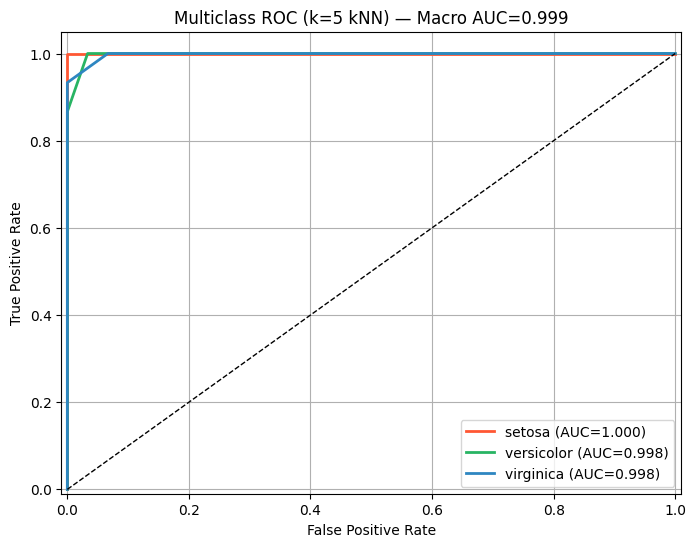

AUC for setosa      : 1.0000
AUC for versicolor  : 0.9978
AUC for virginica   : 0.9978
Macro-averaged AUC: 0.9985
roc_auc_score (macro): 0.9985185185185186


In [4]:
# 4. ROC Curves and AUC for Multiclass

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

# One-vs-rest binarization of test labels
y_te_bin = label_binarize(y_te, classes=np.unique(labels))
n_classes = y_te_bin.shape[1]

# Get predicted probabilities
proba_scores = knn_model.predict_proba(X_te)

# Calculate ROC and AUC per class
fpr_dict, tpr_dict, auc_dict = {}, {}, {}
for cls_idx in range(n_classes):
    fpr_dict[cls_idx], tpr_dict[cls_idx], _ = roc_curve(y_te_bin[:, cls_idx],
                                                        proba_scores[:, cls_idx])
    auc_dict[cls_idx] = auc(fpr_dict[cls_idx], tpr_dict[cls_idx])

# Macro-average AUC
avg_auc = np.mean(list(auc_dict.values()))

# Plot ROC curves
plt.figure(figsize=(8,6))
palette = ['#FF5733', '#28B463', '#2E86C1']
for i in range(n_classes):
    plt.plot(fpr_dict[i], tpr_dict[i],
             label=f"{class_names[i]} (AUC={auc_dict[i]:.3f})",
             lw=2, color=palette[i])

plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlim(-0.01, 1.01)
plt.ylim(-0.01, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Multiclass ROC (k=5 kNN) — Macro AUC={avg_auc:.3f}')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC per class
for i in range(n_classes):
    print(f"AUC for {class_names[i]:<12}: {auc_dict[i]:.4f}")
print(f"Macro-averaged AUC: {avg_auc:.4f}")

# Validate with sklearn's built-in macro AUC
print("roc_auc_score (macro):", 
      roc_auc_score(y_te_bin, proba_scores, average='macro'))